In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/data.csv')
data.dropna(axis=0)
data.head()

,Date,Close,Open,High,Low,Volume
0,2010.1.4,81.51,79.63,81.79,79.63,263.54K
1,2010.1.5,81.77,81.63,82.00,80.95,258.89K
2,2010.1.6,83.18,81.43,83.52,80.85,370.06K
3,2010.1.7,82.66,83.20,83.36,82.26,246.63K
4,2010.1.8,82.75,82.65,83.47,81.80,310.38K


In [3]:
#데이터 구성

high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2
mid_prices = mid_prices.reshape(-1, 1)
mid_prices

array([[80.71 ],
       [81.475],
       [82.185],
       ...,
       [37.03 ],
       [37.   ],
       [38.365]])

In [4]:
#데이터셋 생성함수

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
look_back = 10

In [6]:
# 데이터 전처리 scale (0,1)

scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(mid_prices)
signal_data

array([[0.67923225],
       [0.68678147],
       [0.69378793],
       ...,
       [0.24818671],
       [0.24789066],
       [0.26136083]])

In [7]:
# train, test

train_size = int(len(signal_data) * 0.9)
test_size = len(signal_data) - train_size
train, test = signal_data[0:train_size], signal_data[train_size:len(signal_data)]
print(len(train), len(test))

2435 271


In [8]:
# 데이터셋 생성

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape, trainY.shape, testX.shape, testY.shape

((2425, 10), (2425,), (261, 10), (261,))

In [9]:
# reshape

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape, testX.shape

((2425, 1, 10), (261, 1, 10))

In [10]:
# root_mean_squared_error

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [11]:
#RNN 모델

model = Sequential()

model.add(SimpleRNN(50, return_sequences=True,  input_shape=(1, look_back)))
model.add(Dropout(0.3))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear')) #다음날 하루
model.compile(loss=root_mean_squared_error, optimizer='Adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1, 50)             3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                7360      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 10,475
Trainable params: 10,475
Non-trainable params: 0
_________________________________________________________________


In [12]:
#RNN 학습

model.fit(trainX, trainY,
         validation_data=(testX, testY),
         batch_size = 10,
         epochs = 100)

Train on 2425 samples, validate on 261 samples
Epoch 1/100
2425/2425 [==============================] - 1s 354us/step - loss: 0.1755 - val_loss: 0.0304
Epoch 2/100
2425/2425 [==============================] - 0s 132us/step - loss: 0.0808 - val_loss: 0.0192
Epoch 3/100
2425/2425 [==============================] - 0s 131us/step - loss: 0.0642 - val_loss: 0.0209
Epoch 4/100
2425/2425 [==============================] - 0s 131us/step - loss: 0.0612 - val_loss: 0.0387
Epoch 5/100
2425/2425 [==============================] - 0s 137us/step - loss: 0.0559 - val_loss: 0.0181
Epoch 6/100
2425/2425 [==============================] - 0s 138us/step - loss: 0.0560 - val_loss: 0.0341
Epoch 7/100
2425/2425 [==============================] - 0s 133us/step - loss: 0.0540 - val_loss: 0.0199
Epoch 8/100
2425/2425 [==============================] - 0s 135us/step - loss: 0.0503 - val_loss: 0.0216
Epoch 9/100
2425/2425 [==============================] - 0s 133us/step - loss: 0.0462 - val_loss: 0.0219
Epoch 10

Epoch 78/100
2425/2425 [==============================] - 0s 128us/step - loss: 0.0299 - val_loss: 0.0186
Epoch 79/100
2425/2425 [==============================] - 0s 128us/step - loss: 0.0316 - val_loss: 0.0173
Epoch 80/100
2425/2425 [==============================] - 0s 131us/step - loss: 0.0314 - val_loss: 0.0200
Epoch 81/100
2425/2425 [==============================] - 0s 129us/step - loss: 0.0314 - val_loss: 0.0195
Epoch 82/100
2425/2425 [==============================] - 0s 135us/step - loss: 0.0323 - val_loss: 0.0162
Epoch 83/100
2425/2425 [==============================] - 0s 138us/step - loss: 0.0316 - val_loss: 0.0174
Epoch 84/100
2425/2425 [==============================] - 0s 130us/step - loss: 0.0316 - val_loss: 0.0185
Epoch 85/100
2425/2425 [==============================] - 0s 144us/step - loss: 0.0323 - val_loss: 0.0235
Epoch 86/100
2425/2425 [==============================] - 0s 193us/step - loss: 0.0322 - val_loss: 0.0160
Epoch 87/100
2425/2425 [======================

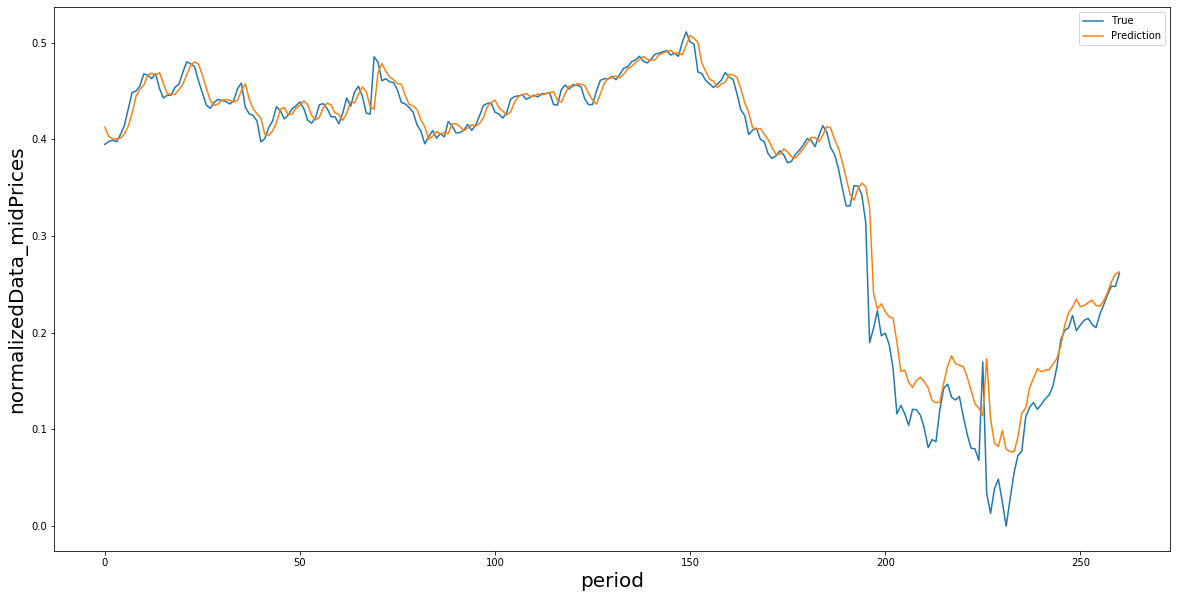

In [13]:
#RNN 예측

pred = model.predict(testX)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(testY, label='True')
ax.plot(pred, label='Prediction')
plt.xlabel('period',fontsize=20)
plt.ylabel('normalizedData_midPrices',fontsize=20)
ax.legend()
plt.show()